In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                567 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,NaN,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
data.shape

(569, 32)

In [8]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    False      False        False         False           False      False   
1    False      False        False         False           False      False   
2    False      False        False         False           False      False   
3    False       True        False         False           False      False   
4    False      False        False         False           False      False   
..     ...        ...          ...           ...             ...        ...   
564  False      False        False         False           False      False   
565  False      False        False         False           False      False   
566  False      False        False         False           False      False   
567  False      False        False         False           False      False   
568  False      False        False         False           False     

In [9]:
data[data.isnull().any(axis=1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,NaN,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
10,845636,NaN,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [10]:
#data['diagnosis'] = pd.to_numeric(data['diagnosis'], errors='coerce')
print("Number of missing values before filling:", data.isnull().sum().sum())


Number of missing values before filling: 2


In [11]:
data = data.fillna(data.mean())

In [12]:
data['diagnosis'].unique()

array(['M', nan, 'B'], dtype=object)

In [13]:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [15]:

# Split the data into features (x1) and target (y1)
y1 = data['diagnosis']
x1 = data.drop(['id', 'diagnosis'], axis=1)
x1.columns


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
# Check the size of your dataset after filling missing values
print("Number of samples after filling missing values:", len(data))


Number of samples after filling missing values: 569


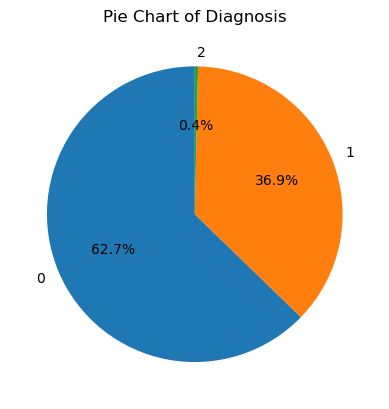

In [17]:
diagnosis_counts = data['diagnosis'].value_counts()
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Diagnosis')
plt.show()

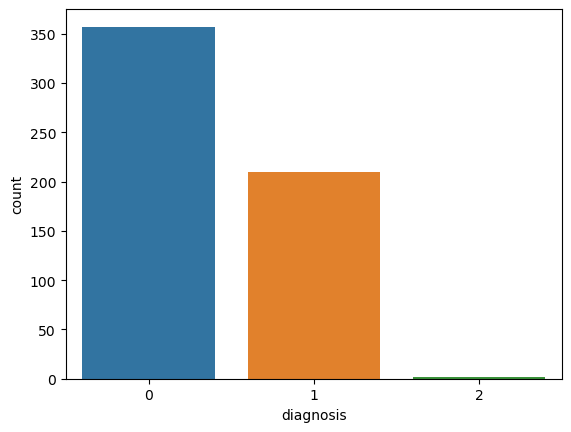

In [18]:
sns.countplot(x='diagnosis', data=data)
plt.show()


In [20]:
#Outliers detection and removal using Z- Score

# Extract numerical columns for outlier detection
numerical_cols = data.select_dtypes(include=['float64']).columns

# Calculate Z-scores for the numerical columns
z_scores = stats.zscore(data[numerical_cols])

# Set a threshold
threshold = 3

# Identify outliers
outliers = (abs(z_scores) > threshold).all(axis=1)

# Remove outliers from the DataFrame
df_no_outliers = data[~outliers]

# Show information about removed outliers
removed_outliers_count = sum(outliers)
print(f"Number of removed outliers: {removed_outliers_count}")

Number of removed outliers: 0


In [21]:
#correlation checking
df = data.drop('radius_se', axis=1)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                               id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039812     0.074626      0.099770   
diagnosis                0.039812   1.000000     0.717150      0.412525   
radius_mean              0.074626   0.717150     1.000000      0.323782   
texture_mean             0.099770   0.412525     0.323782      1.000000   
perimeter_mean           0.073159   0.729838     0.997855      0.329533   
area_mean                0.096893   0.696000     0.987357      0.321086   
smoothness_mean         -0.012968   0.360741     0.170581     -0.023389   
compactness_mean         0.000096   0.596301     0.506124      0.236702   
concavity_mean           0.050080   0.689209     0.676764      0.302418   
concave points_mean      0.044158   0.767537     0.822529      0.293464   
symmetry_mean           -0.022114   0.331592     0.147741      0.071401   
fractal_dimension_mean  -0.052511   0.001977    -0.311631     -0.076437   
texture_se              -

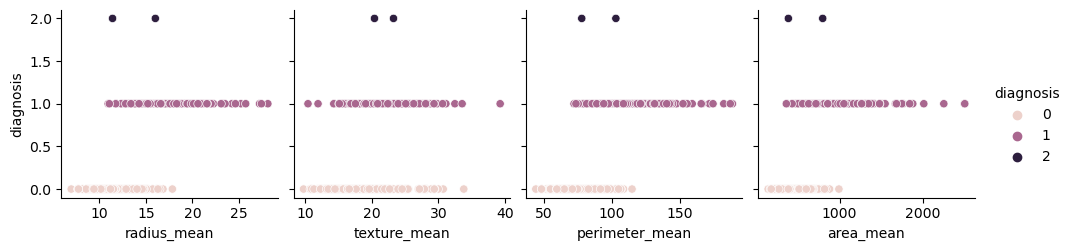

In [22]:
# Visualize pairplots
sns.pairplot(data, x_vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'], y_vars=['diagnosis'], hue='diagnosis')
plt.show()

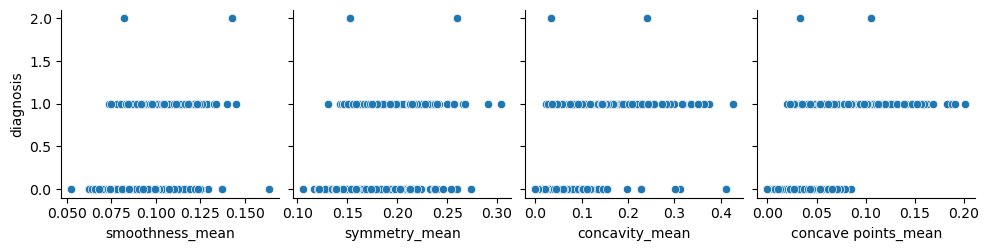

In [23]:
sns.pairplot(data, x_vars=['smoothness_mean', 'symmetry_mean', 'concavity_mean', 'concave points_mean'], y_vars=['diagnosis'])
plt.show()

In [24]:
print("Number of samples before dropping missing values:", len(data))

Number of samples before dropping missing values: 569


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,train_size=0.7,random_state=123)


In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [27]:
model=LogisticRegression(max_iter=5000)

In [28]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [29]:
y_pred=model.predict(x_test)

In [30]:
print(data['diagnosis'].unique())

[1 2 0]


In [34]:
#RandomForest Classifier
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

feature_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

x_train,x_test,y_train,y_test=train_test_split(x1,y1,train_size=0.7,random_state=2529)

rf_model = RandomForestClassifier(random_state=2529)

# Train the model
rf_model.fit(x_train, y_train)

# Predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9649122807017544
Precision: 0.9592346562198376
Recall: 0.9649122807017544
Confusion Matrix:
[[100   2   0]
 [  3  65   0]
 [  0   1   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.96      0.96      0.96        68
           2       0.00      0.00      0.00         1

    accuracy                           0.96       171
   macro avg       0.64      0.65      0.64       171
weighted avg       0.96      0.96      0.96       171



In [35]:
confusion_matrix(y_test,y_pred)

array([[100,   2,   0],
       [  3,  65,   0],
       [  0,   1,   0]], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.9649122807017544

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.96      0.96      0.96        68
           2       0.00      0.00      0.00         1

    accuracy                           0.96       171
   macro avg       0.64      0.65      0.64       171
weighted avg       0.96      0.96      0.96       171



In [40]:
recall_score(y_test,y_pred, average='weighted')

0.9649122807017544

In [41]:
precision_score(y_test,y_pred, average='weighted')

0.9592346562198376